In [1]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

## Reading the dataset

#### Reading the `application_data.csv` using pandas

In [2]:
application_data = pd.read_csv('./application_data.csv')
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

### Understanding dataframe and columns data type

In this step we understand below two things

- Checking the shape of dataframe
- The data type of the columns

In [3]:
print('Shape of the dataframe')
print(application_data.shape)
print()
print('Dataframe Info')
print()
application_data.info()
print('Dataframe describe Numerical Info')
print()
application_data.describe()
print('Dataframe coulmns')
print()
application_data.columns


Shape of the dataframe
(307511, 122)

Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
Dataframe describe Numerical Info

Dataframe coulmns



Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data quality and missing value checks 

#### Finding the percentage of missing values for all columns

In [4]:
# Finding the percentage of missing values for all columns
print('Percentage of rows null in each column')
columns = round(application_data.isnull().sum() / len(application_data) * 100, 2)
columns

Percentage of rows null in each column


SK_ID_CURR                    0.0000
TARGET                        0.0000
NAME_CONTRACT_TYPE            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY    13.5000
AMT_REQ_CREDIT_BUREAU_WEEK   13.5000
AMT_REQ_CREDIT_BUREAU_MON    13.5000
AMT_REQ_CREDIT_BUREAU_QRT    13.5000
AMT_REQ_CREDIT_BUREAU_YEAR   13.5000
Length: 122, dtype: float64

#### Removing columns with >= 50% null values

In [5]:
# dropping columns that have rows 50% or more null

application_data = application_data.drop(columns[columns >= 50].index, axis=1)
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [6]:
application_data.shape

(307511, 81)

In [7]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-815.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,-19005,-3039,-9833.0000,-2437,1,1,0,1,0,0,Laborers,2.0000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,-617.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,-19932,-3038,-4311.0000,-3458,1,1,0,1,0,0,Core staff,1.0000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-1106.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
# Checking number of columns in the Datafram
print('Percentage of rows null in each column')
columns = round(application_data.isnull().sum() / len(application_data) * 100, 2)

columns[columns > 0]

Percentage of rows null in each column


AMT_GOODS_PRICE                 0.0900
NAME_TYPE_SUITE                 0.4200
OCCUPATION_TYPE                31.3500
EXT_SOURCE_2                    0.2100
EXT_SOURCE_3                   19.8300
YEARS_BEGINEXPLUATATION_AVG    48.7800
FLOORSMAX_AVG                  49.7600
YEARS_BEGINEXPLUATATION_MODE   48.7800
FLOORSMAX_MODE                 49.7600
YEARS_BEGINEXPLUATATION_MEDI   48.7800
FLOORSMAX_MEDI                 49.7600
TOTALAREA_MODE                 48.2700
EMERGENCYSTATE_MODE            47.4000
OBS_30_CNT_SOCIAL_CIRCLE        0.3300
DEF_30_CNT_SOCIAL_CIRCLE        0.3300
OBS_60_CNT_SOCIAL_CIRCLE        0.3300
DEF_60_CNT_SOCIAL_CIRCLE        0.3300
AMT_REQ_CREDIT_BUREAU_HOUR     13.5000
AMT_REQ_CREDIT_BUREAU_DAY      13.5000
AMT_REQ_CREDIT_BUREAU_WEEK     13.5000
AMT_REQ_CREDIT_BUREAU_MON      13.5000
AMT_REQ_CREDIT_BUREAU_QRT      13.5000
AMT_REQ_CREDIT_BUREAU_YEAR     13.5000
dtype: float64

## Handling missing values

For columns with 13% or less than null, values, let us check what method we can adopt to impute them.

### Column `AMT_REQ_CREDIT_BUREAU_DAY`
The column has 13.5% values missing and below simply describing and looking at the normalized `value_counts` will give us an idea of how to impute the missing values.


##### Method to impute values
The `mean` and `median` of the values are really close and `99.4` of the values are at 0, so we can perfectly impute/replace the missing values with **`0.00`**.

In [9]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count   265992.0000
mean         0.0070
std          0.1108
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max          9.0000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [10]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True) * 100

0.0000   99.4402
1.0000    0.4857
2.0000    0.0399
3.0000    0.0169
4.0000    0.0098
5.0000    0.0034
6.0000    0.0030
9.0000    0.0008
8.0000    0.0004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### Column `NAME_TYPE_SUITE`
The column is of categorical type with total of 7 categories and there are total of 0.19%.

##### Method to impute values
The `value_counts` method gives the result that category `Unaccompanied` is used in appx 81% rows and is also the `mode` for the column.

We can perfectly replace/impute missing values with `Unaccompanied`. 

In [11]:
application_data['NAME_TYPE_SUITE'].value_counts(normalize=True) * 100

Unaccompanied     81.1596
Family            13.1112
Spouse, partner    3.7130
Children           1.0669
Other_B            0.5780
Other_A            0.2828
Group of people    0.0885
Name: NAME_TYPE_SUITE, dtype: float64

In [12]:
application_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

### Column `OBS_30_CNT_SOCIAL_CIRCLE`
This column has `0.33%` values missing. 

On describe the column, we can see there are outliers in the column with values **348** whereas the `mean` is **1.422** and `median` is **0.00**. It is also notable from method `value_counts` that almost `54%` of the values in the column are **0**.


##### Method to impute values
As there are outliers because of which the `mean` is also skwed from the `median`, is why it is suggested to replace/impute values using `median` i.e **0.0**.

In [13]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count   306490.0000
mean         1.4222
std          2.4010
min          0.0000
25%          0.0000
50%          0.0000
75%          2.0000
max        348.0000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [14]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True) * 100

0.0000     53.4797
1.0000     15.9167
2.0000      9.7256
3.0000      6.6306
4.0000      4.6145
5.0000      3.1169
6.0000      2.1055
7.0000      1.4323
8.0000      0.9681
9.0000      0.6535
10.0000     0.4490
11.0000     0.2780
12.0000     0.2127
13.0000     0.1341
14.0000     0.0842
15.0000     0.0542
16.0000     0.0434
17.0000     0.0287
18.0000     0.0150
19.0000     0.0144
20.0000     0.0098
21.0000     0.0095
22.0000     0.0072
23.0000     0.0049
24.0000     0.0036
25.0000     0.0036
27.0000     0.0016
26.0000     0.0010
30.0000     0.0007
28.0000     0.0003
348.0000    0.0003
29.0000     0.0003
47.0000     0.0003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Column `EXT_SOURCE_2`
This column has `0.21%` values missing. 
​
On describe the column, the `mean` is **0.51** and `median` is **0.56**.
​
​
##### Method to impute values
As there are not much big outliers because of which the `mean` is also skwed from the `median`, is why it is suggested to replace/impute values using `mean` i.e **0.51**.

In [15]:
#Check % of Null Values for column EXT_SOURCE_2 
round(100*(application_data.EXT_SOURCE_2.isnull().sum()/len(application_data.index)), 2)

0.21

In [16]:
application_data['EXT_SOURCE_2'].describe()

count   306851.0000
mean         0.5144
std          0.1911
min          0.0000
25%          0.3925
50%          0.5660
75%          0.6636
max          0.8550
Name: EXT_SOURCE_2, dtype: float64

In [17]:
application_data['EXT_SOURCE_2'].value_counts(normalize=True) * 100

0.2859   0.2350
0.2623   0.1359
0.2653   0.1118
0.1597   0.1049
0.2653   0.0997
          ...  
0.1691   0.0003
0.2138   0.0003
0.0580   0.0003
0.2291   0.0003
0.3364   0.0003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [18]:
#Check the quantiles for field EXT_SOURCE_2 
application_data.EXT_SOURCE_2.quantile([0.95, 0.99])

0.9500   0.7477
0.9900   0.7828
Name: EXT_SOURCE_2, dtype: float64

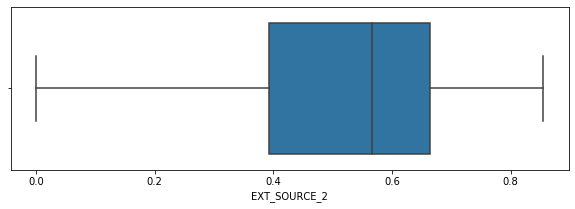

In [19]:
#Plot a box plot to see any outliers
plt.figure(figsize=[10,3])
sns.boxplot(application_data.EXT_SOURCE_2)
plt.show()

### Column `AMT_GOODS_PRICE`
This column has `0.09%` values missing. 
​
On describe the column, the `mean` is **538396** and `median` is **450000**.
​
​
##### Method to impute values
As there are not much big outliers because of which the `mean` is also skwed from the `median`, is why it is suggested to replace/impute values using `mean` i.e **538396**.

#Check % of Null Values for column AMT_GOODS_PRICE 
round(100*(df.AMT_GOODS_PRICE.isnull().sum()/len(df.index)), 2)

In [20]:
#Check the mean/median for field AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [21]:
#Check the quantiles for field AMT_GOODS_PRICE 
application_data.AMT_GOODS_PRICE.quantile([0.95, 0.99])

0.9500   1305000.0000
0.9900   1800000.0000
Name: AMT_GOODS_PRICE, dtype: float64

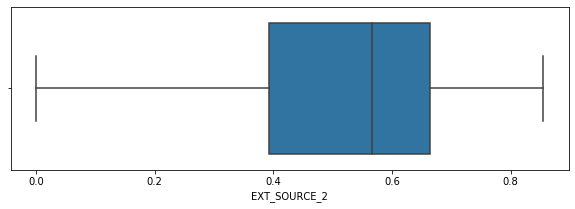

In [22]:
#Plot a box plot to see any outliers
plt.figure(figsize=[10,3])
sns.boxplot(application_data.EXT_SOURCE_2)
plt.show()

## Converting values

### Column: `DAYS_BIRTH`

The values are negative here, we first convert them in positive

In [23]:
# Getting the absolute value of the column
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,-637,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,-225,-4260.0000,-2531,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-815.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,-3039,-9833.0000,-2437,1,1,0,1,0,0,Laborers,2.0000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,-617.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,-3038,-4311.0000,-3458,1,1,0,1,0,0,Core staff,1.0000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-1106.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Checking outliers

Checking outliers must be done for all quantitative columns in the dataframe.

In [24]:
quants = application_data.select_dtypes(['float', 'int'])
quants.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307509.0000,306851.0000,246546.0000,157504.0000,154491.0000,157504.0000,154491.0000,157504.0000,154491.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-4986.1203,2.1527,0.5144,0.5109,0.9777,0.2263,0.9771,0.2223,0.9778,0.2259,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,237123.1463,402490.7770,14493.7373,369446.4605,0.0138,3522.8863,0.9107,0.1911,0.1948,0.0592,0.1446,0.0646,0.1437,0.0599,0.1451,0.1075,2.4010,0.4467,2.3798,0.3623,826.8085,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-24672.0000,1.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,112500.0000,270000.0000,16524.0000,238500.0000,0.0100,-7479.5000,2.0000,0.3925,0.3706,0.9767,0.1667,0.9767,0.1667,0.9767,0.1667,0.0412,0.0000,0.0000,0.0000,0.0000,-1570.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,147150.0000,513531.0000,24903.0000,450000.0000,0.0188,-4504.0000,2.0000,0.5660,0.5353,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0000,0.0000,0.0000,0.0000,-757.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,202500.0000,808650.0000,34596.0000,679500.0000,0.0287,-2010.0000,3.0000,0.6636,0.6691,0.9866,0.3333,0.9866,0.3333,0.9866,0.3333,0.1276,2.0000,0.0000,2.0000,0.0000,-274.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
max,117000000.0000,4050000.0000,258025.5000,4050000.0000,0.0725,0.0000,20.0000,0.8550,0.8960,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,348.0000,34.0000,344.0000,24.0000,0.0000,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000


In [25]:
quants = application_data.select_dtypes(['float', 'int'])

quants.quantile([0, 0.99, 1])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0.0000,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-24672.0000,1.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.9900,472500.0000,1854000.0000,70006.5000,1800000.0000,0.0725,-50.0000,5.0000,0.7828,0.8328,0.9990,0.6667,0.9990,0.6667,0.9990,0.6667,0.5258,10.0000,2.0000,10.0000,2.0000,0.0000,0.0000,0.0000,1.0000,4.0000,2.0000,8.0000
1.0000,117000000.0000,4050000.0000,258025.5000,4050000.0000,0.0725,0.0000,20.0000,0.8550,0.8960,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,348.0000,34.0000,344.0000,24.0000,0.0000,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000


### Column `AMT_INCOME_TOTAL`

Here values till 99 percentile don't have much variation but after 99 percentile we can see the shift in values.
Above conclusion can also be confirmed with a box plot as well.

In [26]:
application_data['AMT_INCOME_TOTAL'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000       25650.0000
0.2500      112500.0000
0.5000      147150.0000
0.7500      202500.0000
0.9900      472500.0000
1.0000   117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

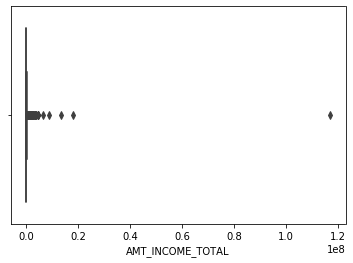

In [27]:
# Let us check this on a box plot and see if there are any outliers
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

### Column `AMT_ANNUITY`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [28]:
application_data['AMT_ANNUITY'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000     1615.5000
0.2500    16524.0000
0.5000    24903.0000
0.7500    34596.0000
0.9900    70006.5000
1.0000   258025.5000
Name: AMT_ANNUITY, dtype: float64

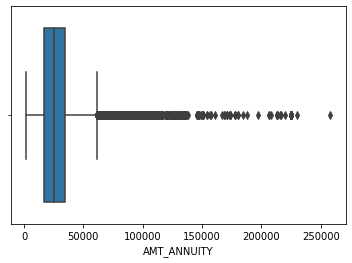

In [29]:
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

### Column `CNT_FAM_MEMBERS`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [30]:
application_data['CNT_FAM_MEMBERS'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000    1.0000
0.2500    2.0000
0.5000    2.0000
0.7500    3.0000
0.9900    5.0000
1.0000   20.0000
Name: CNT_FAM_MEMBERS, dtype: float64

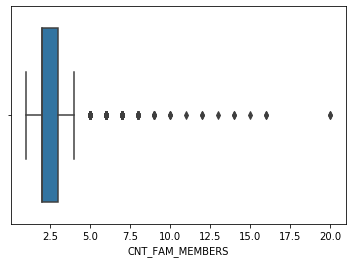

In [31]:
sns.boxplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

### Column `OBS_30_CNT_SOCIAL_CIRCLE`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [32]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000     0.0000
0.2500     0.0000
0.5000     0.0000
0.7500     2.0000
0.9900    10.0000
1.0000   348.0000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

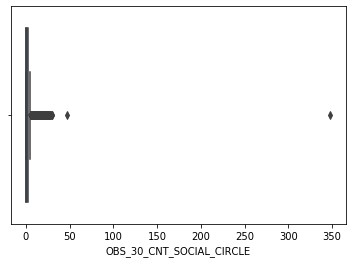

In [33]:
sns.boxplot(application_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

### Column `AMT_REQ_CREDIT_BUREAU_QRT`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [34]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000     0.0000
0.2500     0.0000
0.5000     0.0000
0.7500     0.0000
0.9900     2.0000
1.0000   261.0000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

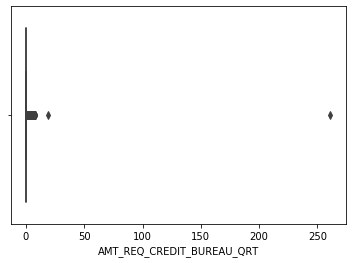

In [35]:
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

### Column `CNT_CHILDREN`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [36]:
application_data['CNT_CHILDREN'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.0000    0.0000
0.2500    0.0000
0.5000    0.0000
0.7500    1.0000
0.9900    3.0000
1.0000   19.0000
Name: CNT_CHILDREN, dtype: float64

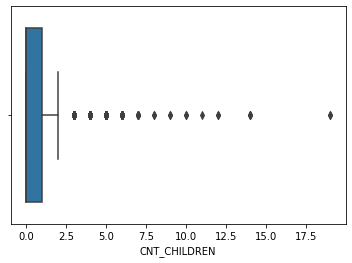

In [37]:
sns.boxplot(application_data['CNT_CHILDREN'])
plt.show()

For below columns as well, we can see the difference with 99 percentile and 100 percentile are high

1. AMT_INCOME_TOTAL
2. AMT_ANNUITY
3. CNT_FAM_MEMBERS
4. OBS_30_CNT_SOCIAL_CIRCLE
5. OBS_60_CNT_SOCIAL_CIRCLE
6. AMT_REQ_CREDIT_BUREAU_QRT
7. CNT_CHILDREN

We can say that these fields contains outliers.

## Binning variables

**Note:** For all columns we are adding the bin values in a column in dataframe as we will use this further for analysis.

### Column `AMT_CREDIT`

In [38]:
bins = [45000, 225000, 300000, 400000, 600000, 800000, 1000000, 1500000]
slots = ['45001 - 225000', '225001 - 300000', '300001 - 400000', '400001 - 600000', '600001 - 800000', 
        '800001 - 1000000', '1000001 and above']

application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'], bins=bins, labels=slots)

### Column `AMT_INCOME_TOTAL`

In [39]:
bins = [25000, 50000, 100000, 200000, 500000, 1000000, 120000000]
slot = ['25K-50K', '50K-1Lac', '1Lac-2Lac', '2Lac-5Lac', '5Lac-10Lac','10Lac and above']
application_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins, labels=slot)

### Column `CNT_FAM_MEMBERS`

In [40]:
bins = [1, 3, 6, 11, 16, 20]
slot = ['1-2', '3-5', '6-10', '11-15', '16 and above']
application_data['CNT_FAM_MEMBERS_RANGE'] = pd.cut(application_data['CNT_FAM_MEMBERS'], bins, labels=slot)

### Column `DAYS_BIRTH`



In [41]:
bins = [20, 30, 36, 41, 47, 53, 60, 70]
labels = ['20-30','31-36', '37-41', '42-47', '48-53', '54-60', '61-above']

application_data['AGE_BIRTH_RANGE'] = pd.cut(application_data['DAYS_BIRTH']/365, bins=bins, labels=labels)

### Calculate `Imbalance Percentange using `TARGET` column

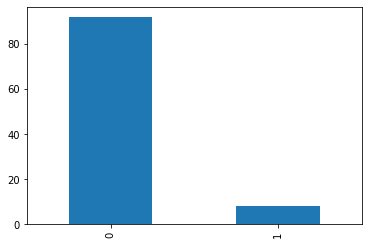

In [42]:
(100*application_data['TARGET'].value_counts(normalize =True)).plot.bar()
plt.show()

### Splitting `application_data` dataframe in two dataframes using `TARGET` column

In [43]:
target_0 = application_data[application_data.TARGET == 0]
target_1 = application_data[application_data.TARGET == 1]



target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,CNT_FAM_MEMBERS_RANGE,AGE_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,-637,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,400001 - 600000,2Lac-5Lac,NaN,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0000,979992.0000,27076.5000,702000.0000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.0180,18724,-2628,-6573.0000,-1827,1,1,0,1,0,0,Cooking staff,1.0000,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.5485,0.1907,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0000,1.0000,10.0000,0.0000,-161.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,800001 - 1000000,1Lac-2Lac,NaN,48-53
40,100047,1,Cash loans,M,N,Y,0,202500.0000,1193580.0000,35028.0000,855000.0000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.0252,17482,-1262,-1182.0000,-1029,1,1,0,1,0,0,Laborers,2.0000,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.3068,0.3202,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0000,0.0000,0.0000,0.0000,-1075.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,2.0000,0.0000,4.0000,1000001 and above,2Lac-5Lac,1-2,48-53
42,100049,1,Cash loans,F,N,N,0,135000.0000,288873.0000,16258.5000,238500.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0073,13384,-3597,-45.0000,-4409,1,1,1,1,1,0,Sales staff,2.0000,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.6742,0.3997,nan,nan,nan,nan,nan,nan,nan,NaN,1.0000,0.0000,1.0000,0.0000,-1480.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,225001 - 300000,1Lac-2Lac,1-2,37-41
81,100096,1,Cash loans,F,N,Y,0,81000.0000,252000.0000,14593.5000,252000.0000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.0287,24794,365243,-5391.0000,-4199,1,0,0,1,0,0,NaN,2.0000,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.0240,0.7209,nan,nan,nan,nan,nan,nan,nan,NaN,1.0000,1.0000,1.0000,1.0000,0.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,225001 - 300000

In [44]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,CNT_FAM_MEMBERS_RANGE,AGE_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1000001 and above,2Lac-5Lac,1-2,42-47
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,-225,-4260.0000,-2531,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-815.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,45001 - 225000,50K-1Lac,NaN,48-53
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,-3039,-9833.0000,-2437,1,1,0,1,0,0,Laborers,2.0000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,-617.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,300001 - 400000,1Lac-2Lac,1-2,48-53
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,-3038,-4311.0000,-3458,1,1,0,1,0,0,Core staff,1.0000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-1106.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,400001 - 600000,1Lac-2Lac,NaN,54-60
5,100008,0,Cash loans,M,N,Y,0,99000.0000,490495.5000,27517.5000,454500.0000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.0358,16941,-1588,-4970.0000,-477,1,1,1,1,1,0,Laborers,2.0000,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.3542,0.6212,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,-2536.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,400001 - 600000,50K-1Lac,1-2,42-47


In [45]:
## Check Type of Variables whrether Continous or Categorical
# Find Unique values per column

application_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
                                ...  
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
EXT_SOURCE_2                   119831
SK_ID_CURR                     307511
Length: 85, dtype: int64

## Analysis

### Column `NAME_CONTRACT_TYPE`

##### Conclusion
Univariate analysis of this column revels that in the default list with the `Cash loans` type have around `8.35%` of defaulters, more than the `Revolving loans`. 
It is anticipated that `Cash loans` might have more defaults than `Revolving loans`.

In [46]:
application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=False)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,8.3500
1,Revolving loans,5.4800


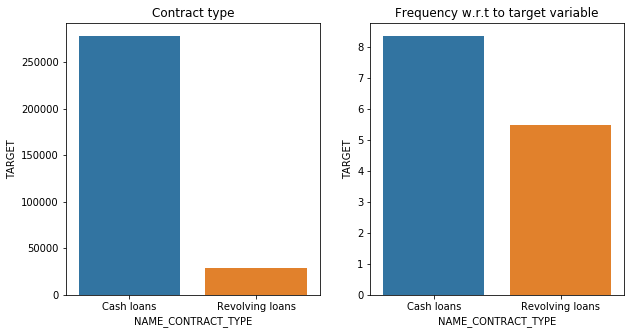

In [47]:
plt.figure(figsize=(10,5))

data = round(target_1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Contract type')
sns.barplot(x='NAME_CONTRACT_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=data)

data

### Column: `AMT_INCOME_TOTAL`

**Note:** We have binned this column above in the binning section.

##### Conclusion

Univariate analysis of this column revels that in the default list, people with income range between 1Lac - 2Lacs have `8.55%` chances of being a default.

,AMT_INCOME_TOTAL_RANGE,TARGET
2,1Lac-2Lac,8.5500
1,50K-1Lac,8.2500
0,25K-50K,7.5900
3,2Lac-5Lac,7.1900
4,5Lac-10Lac,5.4200
5,10Lac and above,5.2000


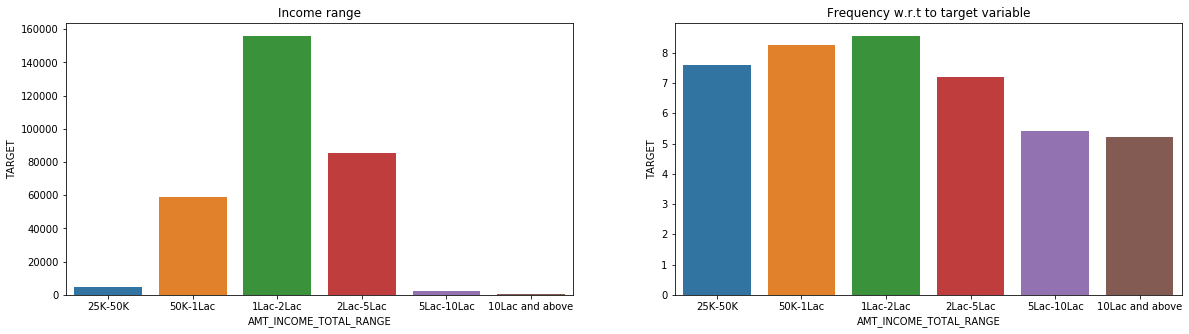

In [48]:
plt.figure(figsize=(20,5))

data = round(target_1.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count()/application_data.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = (application_data.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count()).reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Income range')
sns.barplot(x='AMT_INCOME_TOTAL_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
sns.barplot(x='AMT_INCOME_TOTAL_RANGE', y='TARGET', data=data)

data

### Column: `OCCUPATION_TYPE`

##### Conclusion

The `Occupation type` of `Low-skill Laborers` have the chances of around `17.5%` of getting default in loan.

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,17.1500
4,Drivers,11.3300
17,Waiters/barmen staff,11.2800
16,Security staff,10.7400
8,Laborers,10.5800
2,Cooking staff,10.4400
14,Sales staff,9.6300
1,Cleaning staff,9.6100
13,Realty agents,7.8600
15,Secretaries,7.0500


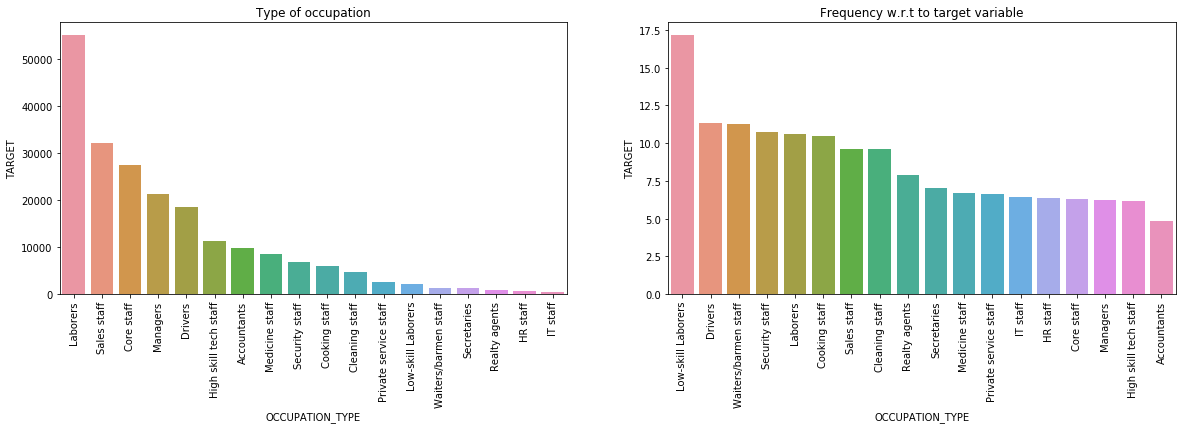

In [49]:
plt.figure(figsize=(20,5))

data = round(target_1.groupby(['OCCUPATION_TYPE'])['TARGET'].count()/application_data.groupby(['OCCUPATION_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['OCCUPATION_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of occupation')
plt.xticks(rotation=90)
sns.barplot(x='OCCUPATION_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='OCCUPATION_TYPE', y='TARGET', data=data)

data

### Column `CNT_FAM_MEMBERS`

**Note:** We have done binning this column above in the binning section.

##### Conclusion

In total, family with 1 or 2 members applied mostly for loan however, family of members **6-10** have chances of `12.61%` of being at default and then family of members 11-15.

,CNT_FAM_MEMBERS_RANGE,TARGET
2,6-10,12.6100
3,11-15,12.5000
1,3-5,8.8100
0,1-2,7.8800
4,16 and above,0.0000


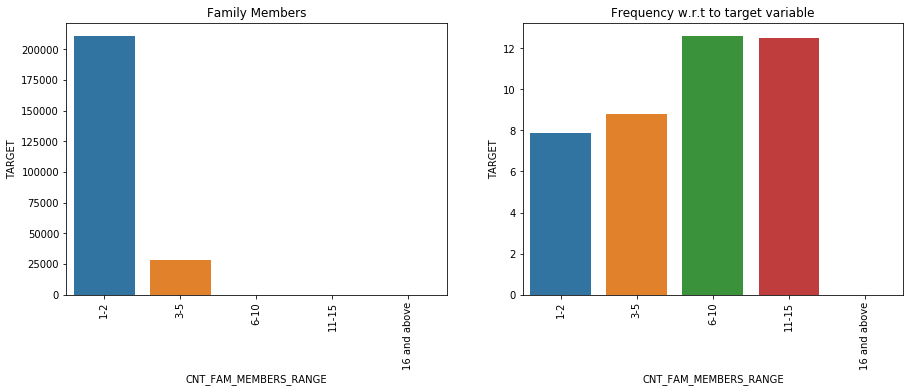

In [50]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count()/application_data.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Family Members')
plt.xticks(rotation=90)
sns.barplot(x='CNT_FAM_MEMBERS_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='CNT_FAM_MEMBERS_RANGE', y='TARGET', data=data)

data

### Column `NAME_HOUSING_TYPE`

##### Conclusion

The count of housing type in `application_data` dataset as House/Apartment highest frequency but when compared W.R.T target variable `Rented apartment` people `12.31%` chances of being at default.

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,12.3100
5,With parents,11.7000
2,Municipal apartment,8.5400
0,Co-op apartment,7.9300
1,House / apartment,7.8000
3,Office apartment,6.5700


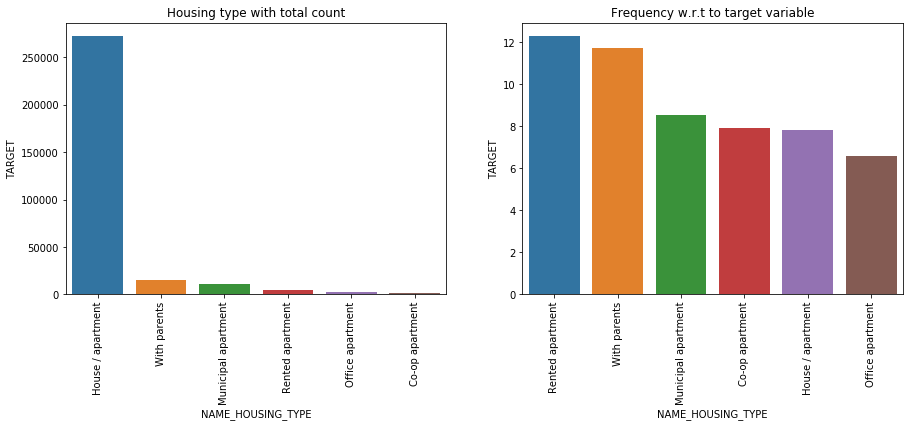

In [51]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Housing type with total count')
plt.xticks(rotation=90)
sns.barplot(x='NAME_HOUSING_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET', data=data)

data

### Column `DAYS_BIRTH`

**Note:** We are using column `AGE_BIRTH_RANGE` which we created in binning section.

##### Conclusion

The age range is between appx 20 and 69, and the loan is taken majorly by age range `54-60`.

When compared to target variable, it turned out to be that the age range `20-30` seems to be having problem majorly in payments and reduces as the age increases.

,AGE_BIRTH_RANGE,TARGET
5,54-60,48132
3,42-47,47290
1,31-36,47236
0,20-30,45021
2,37-41,43690
4,48-53,40563
6,61-above,35579


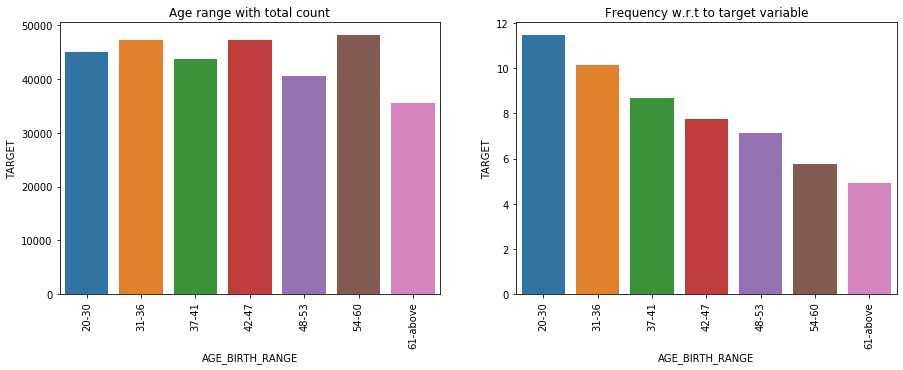

In [52]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count()/application_data.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Age range with total count')
plt.xticks(rotation=90)
sns.barplot(x='AGE_BIRTH_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='AGE_BIRTH_RANGE', y='TARGET', data=data)

all_data

### Column `ORGANIZATION_TYPE`

##### Conclusion

When looking at the entire dataset, most of the applicant's type of organization type is `Business Entity Type3` and default in payments turns out to be from organization type `Transport Type3` with appx rate of `~16%`.

,ORGANIZATION_TYPE,TARGET
5,Business Entity Type 3,67992
57,XNA,55374
42,Self-employed,38412
33,Other,16683
30,Medicine,11193


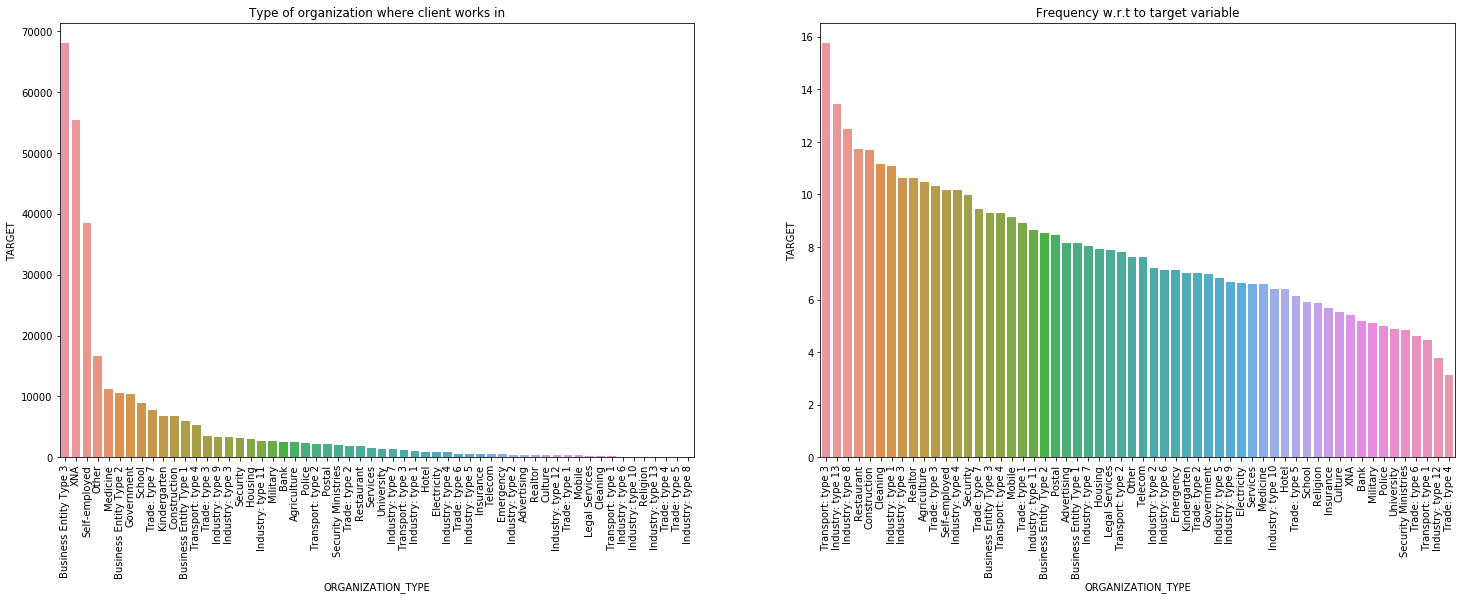

In [53]:
plt.figure(figsize=(25,8))

data = round(target_1.groupby(['ORGANIZATION_TYPE'])['TARGET'].count()/application_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of organization where client works in')
plt.xticks(rotation=90)
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='ORGANIZATION_TYPE', y='TARGET', data=data)

all_data.head(5)

Column CODE_GENDER¶

Conclusion:
When looking at the entire dataset, most of the applicant's gender code is Female and default in payments turns out to be from gender code Male with appx rate of ~10% while Femaile Defaulters are appx ~7%.

,CODE_GENDER,TARGET
0,F,202448
1,M,105059
2,XNA,4


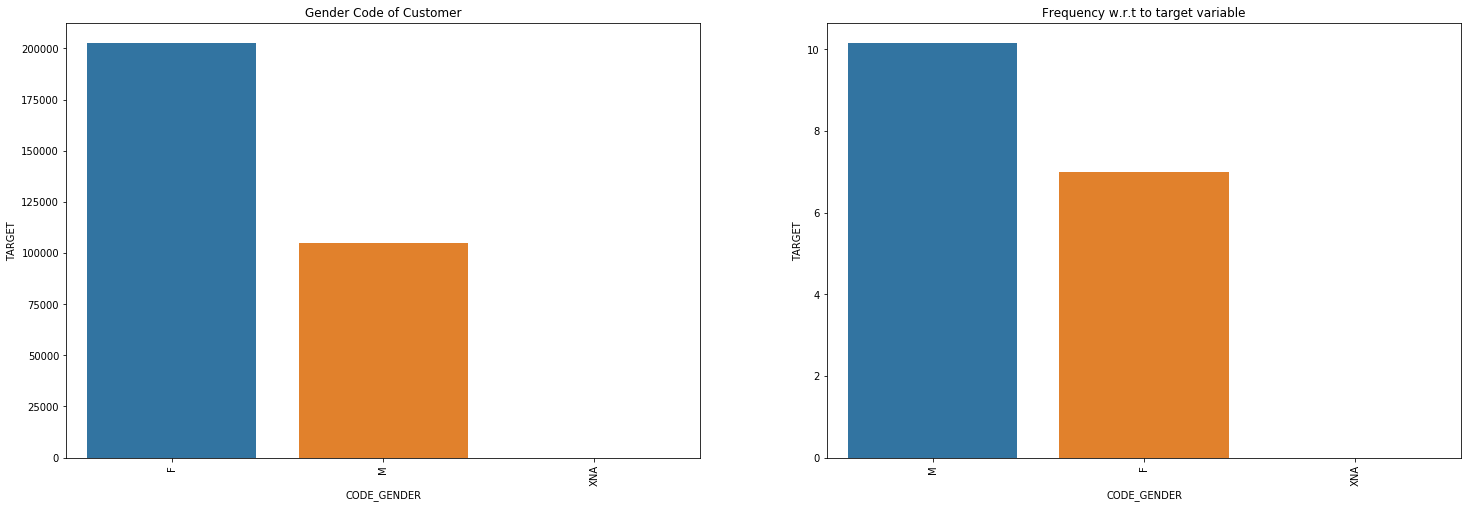

In [54]:
plt.figure(figsize=(25,8))

data = round(target_1.groupby(['CODE_GENDER'])['TARGET'].count()/application_data.groupby(['CODE_GENDER'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['CODE_GENDER'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Gender Code of Customer')
plt.xticks(rotation=90)
sns.barplot(x='CODE_GENDER',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='CODE_GENDER', y='TARGET', data=data)

all_data.head(5)

Column FLAG_OWN_CAR¶

Conclusion:
When looking at the entire dataset, most of the applicant's FLAG_OWN_CAR flag is 'No', in payments turns out to be the same pattern 
Defaulters with FLAG_OWN_CAR is Yes :8.5%
Defaulters with FLAG_OWN_CAR is No : 7.24%.

,FLAG_OWN_CAR,TARGET
0,N,202924
1,Y,104587


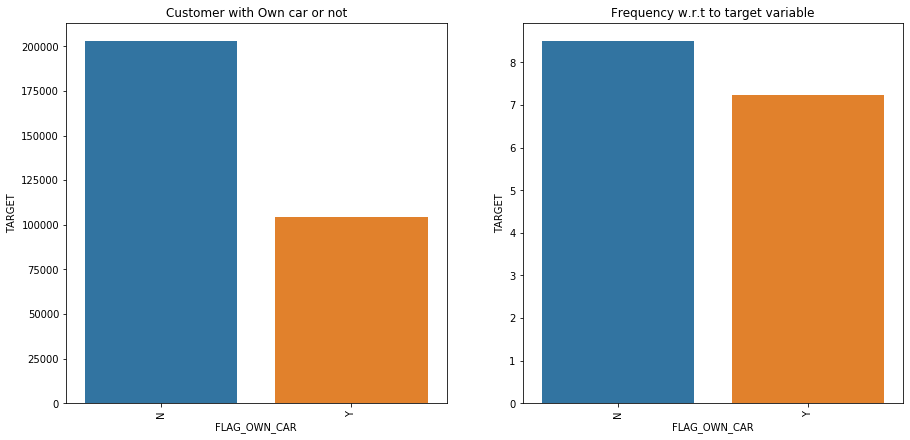

In [55]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['FLAG_OWN_CAR'])['TARGET'].count()/application_data.groupby(['FLAG_OWN_CAR'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['FLAG_OWN_CAR'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Customer with Own car or not')
plt.xticks(rotation=90)
sns.barplot(x='FLAG_OWN_CAR',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=data)

all_data.head(5)

Column FLAG_OWN_REALTY¶

Conclusion:
When looking at the entire dataset, most of the applicant's FLAG_OWN_REALTY flag is 'YES', in payments there is no pattern , It is not affecting to have own realty while defaulting in loans
Defaulters with FLAG_OWN_REALTY is Yes :8.32%
Defaulters with FLAG_OWN_REALTY is No : 7.96%.

,FLAG_OWN_REALTY,TARGET
1,Y,213312
0,N,94199


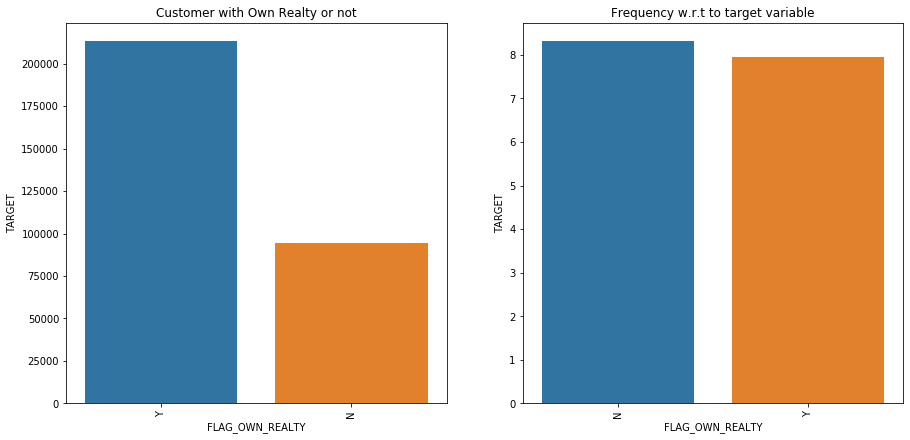

In [56]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['FLAG_OWN_REALTY'])['TARGET'].count()/application_data.groupby(['FLAG_OWN_REALTY'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['FLAG_OWN_REALTY'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Customer with Own Realty or not')
plt.xticks(rotation=90)
sns.barplot(x='FLAG_OWN_REALTY',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET', data=data)

all_data.head(5)


Column NAME_CONTRACT_TYPE¶

Conclusion:
When looking at the entire dataset, most of the applicant's has NAME_CONTRACT_TYPE as Cash Loans, in payments there is similar pattern.
Defaulters with Cash Loans :8.35%, 
Defaulters with Revolving Loans : 5.48%
Cash loans has high chances to default

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,278232
1,Revolving loans,29279


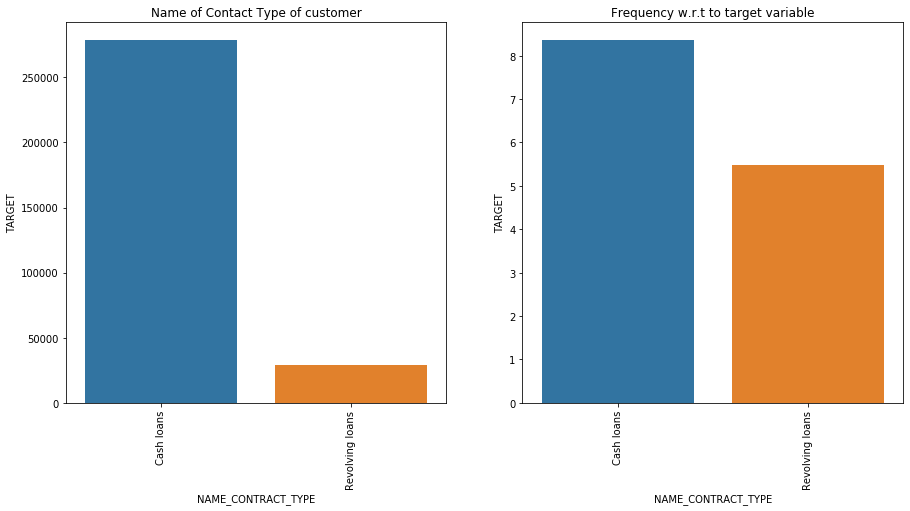

In [57]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Name of Contact Type of customer')
plt.xticks(rotation=90)
sns.barplot(x='NAME_CONTRACT_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=data)

all_data.head(5)

Column NAME_EDUCATION_TYPE¶

Conclusion:
When looking at the entire dataset, most of the applicant's has NAME_EDUCATION_TYPE as econdary / secondary special, in terma payments there is diffrent pattern.

Defaulters with Academic degree is : 1.83%
Defaulters with Higher education is : 5.36%
Defaulters with Incomplete higher is : 8.48%
Defaulters with Lower secondary is : 10.93%
Defaulters with Secondary / secondary special is : 8.94% 
##### People with Lower secondary education have more chances to deafault

,NAME_EDUCATION_TYPE,TARGET
4,Secondary / secondary special,218391
1,Higher education,74863
2,Incomplete higher,10277
3,Lower secondary,3816
0,Academic degree,164


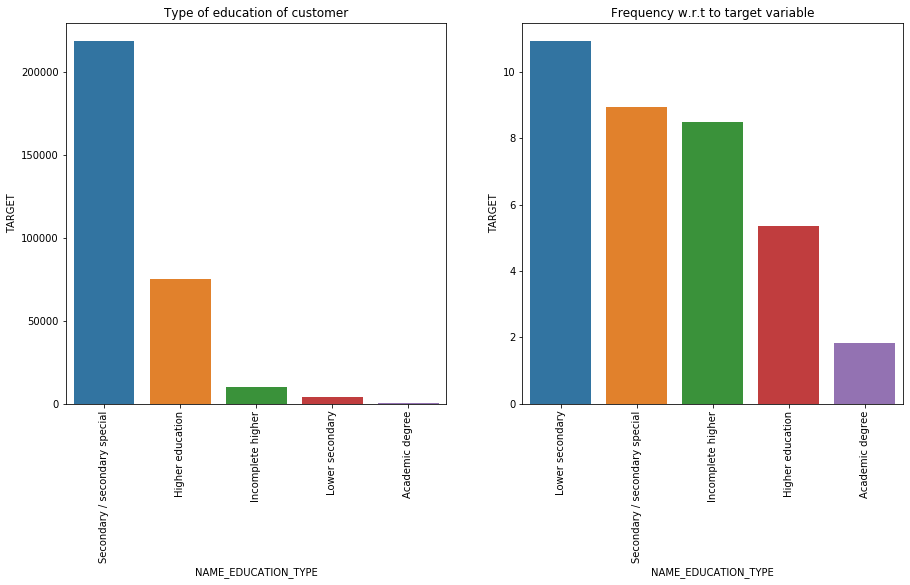

In [58]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of education of customer')
plt.xticks(rotation=90)
sns.barplot(x='NAME_EDUCATION_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=data)

all_data.head(5)

Column NAME_FAMILY_STATUS¶

Conclusion:
When looking at the entire dataset, most of the applicant's has NAME_FAMILY_STATUS as Married, in terma payments there is no diffrent pattern.

Defaulters with Civil marriage : 9.94
Defaulters with Married : 7.56%
Defaulters with Separated : 8.19%
Defaulters with Single / not married : 9.81%
Defaulters with Widow : 5.82%
##### Chances for default are more for Civil marriage and Single/Not Married

,NAME_FAMILY_STATUS,TARGET
1,Married,196432
3,Single / not married,45444
0,Civil marriage,29775
2,Separated,19770
5,Widow,16088


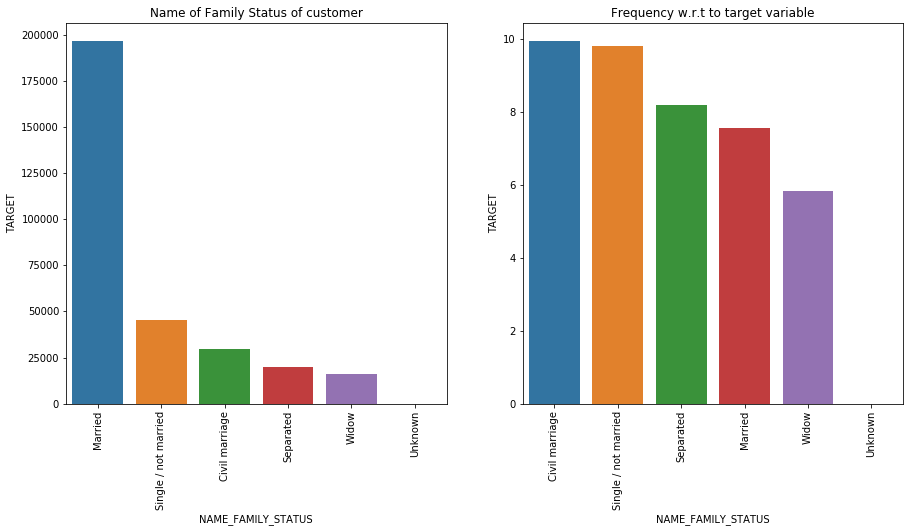

In [59]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['NAME_FAMILY_STATUS'])['TARGET'].count()/application_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Name of Family Status of customer')
plt.xticks(rotation=90)
sns.barplot(x='NAME_FAMILY_STATUS',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET', data=data)

all_data.head(5)

Column NAME_INCOME_TYPE¶

Conclusion:
When looking at the entire dataset, most of the applicant's has NAME_INCOME_TYPE as Working, in terms of payments defaulter there is diffrent pattern.

Defaulters with Income_type Businessman : almost 0%, 
Defaulters with Commercial associate : 7.48% , 
Defaulters with Maternity leave : 40.00%, 
Defaulters with Pensioner  : 5.39% ,
Defaulters with State servant : 5.75% , 
Defaulters with Student : almost 0% ,
Defaulters with Unemployed : 36.36% ,
Defaulters with Working : 9.59% ,
##### Chances for defaulting are very high for Income_type : Maternity leave and Unemployed, But input Data is very less for these categories.

,NAME_INCOME_TYPE,TARGET
7,Working,158774
1,Commercial associate,71617
3,Pensioner,55362
4,State servant,21703
6,Unemployed,22


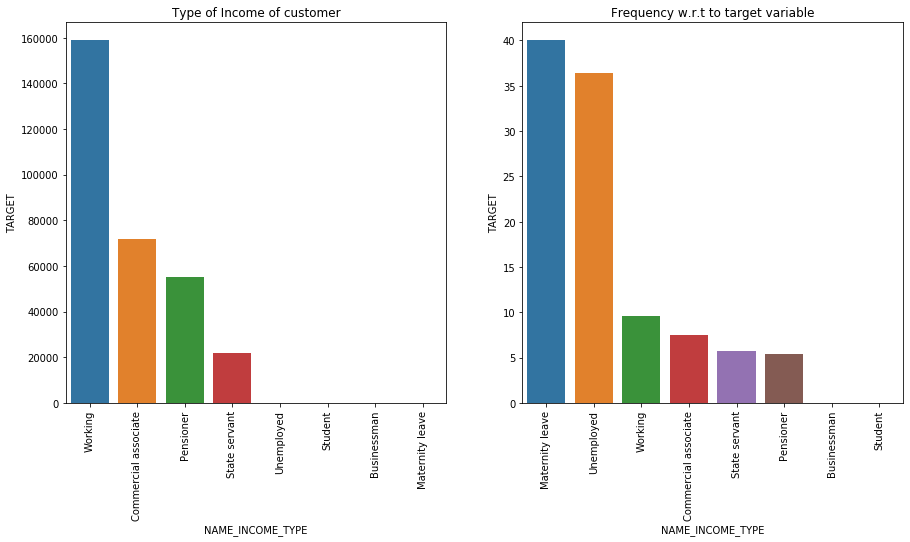

In [60]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['NAME_INCOME_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of Income of customer')
plt.xticks(rotation=90)
sns.barplot(x='NAME_INCOME_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=data)

all_data.head(5)

Column CNT_CHILDREN¶

Conclusion:
When looking at the entire dataset, most of the applicant's has CNT_CHILDREN less than 4 , in terms of payments defaulter there completely diffrent pattern.


##### People having more children have very high chances to default .

,CNT_CHILDREN,TARGET
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429


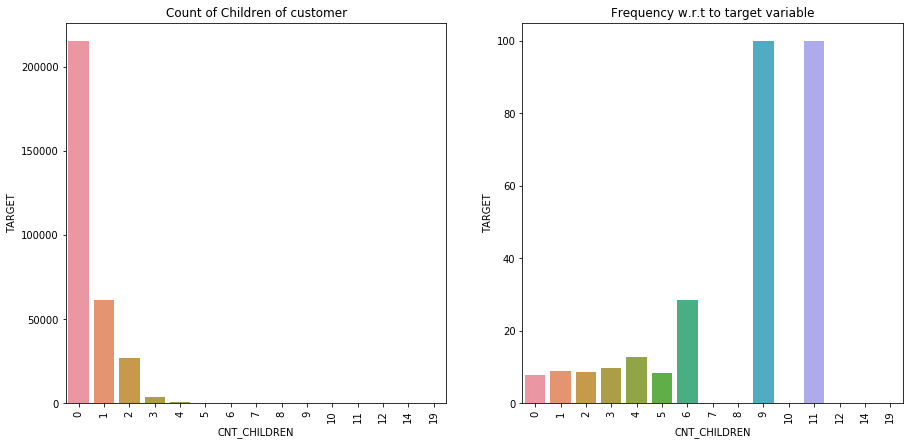

In [61]:
plt.figure(figsize=(15,7))

data = round(target_1.groupby(['CNT_CHILDREN'])['TARGET'].count()/application_data.groupby(['CNT_CHILDREN'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['CNT_CHILDREN'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Count of Children of customer')
plt.xticks(rotation=90)
sns.barplot(x='CNT_CHILDREN',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='CNT_CHILDREN', y='TARGET', data=data)

all_data.head(5)

Column AMT_ANNUITY¶

Conclusion:
When looking at the entire dataset, most of the applicant's has AMT_ANNUITY less than 100000 

##### People having less amount of annuity have high chances to default .

([array([164430.000000, 103036.000000, 13569.000000, 1222.000000,
         296.000000, 60.000000, 22.000000, 5.000000, 33.000000, 1.000000]),
  array([14486.000000, 9444.000000, 842.000000, 46.000000, 6.000000,
         1.000000, 0.000000, 0.000000, 0.000000, 0.000000])],
 array([1615.500000, 27256.500000, 52897.500000, 78538.500000,
        104179.500000, 129820.500000, 155461.500000, 181102.500000,
        206743.500000, 232384.500000, 258025.500000]),
 <a list of 2 Lists of Patches objects>)

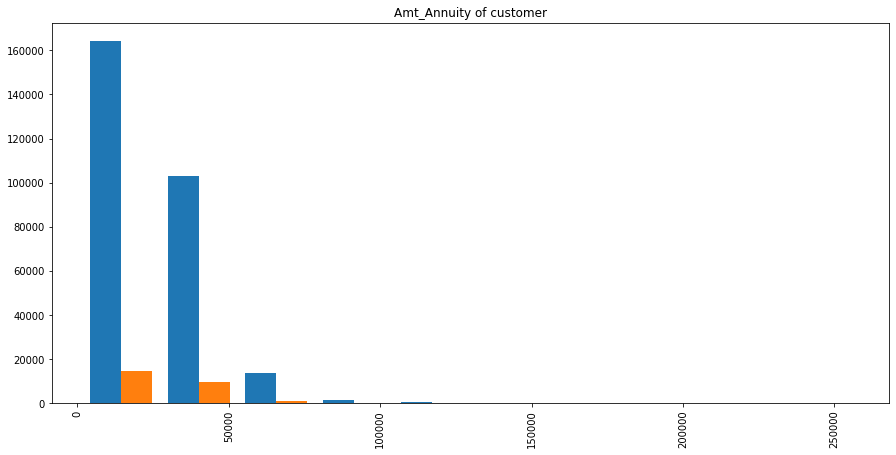

In [62]:
plt.figure(figsize = (15,7))

plt.title('Amt_Annuity of customer')
plt.xticks(rotation=90)

x1 = list(application_data[application_data['TARGET'] == 0]['AMT_ANNUITY'])
x2 = list(application_data[application_data['TARGET'] == 1]['AMT_ANNUITY'])
plt.hist([x1,x2])

## Correlation

In [63]:
num_df = application_data[['TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY']]

In [1]:
plt.figure(figsize = (15,7))

corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot =True)

NameError: name 'plt' is not defined

In [65]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [66]:
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf

,Var1,Var2,Correlation
0,TARGET,TARGET,nan
1,TARGET,AMT_INCOME_TOTAL,nan
2,TARGET,AMT_CREDIT,nan
3,TARGET,AMT_ANNUITY,nan
4,TARGET,AMT_GOODS_PRICE,nan
...,...,...,...
191,REG_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_QRT,-0.0052
192,REG_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR,-0.0080
193,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,0.2398
194,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.8256


In [67]:
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [68]:
positive = corrdf[corrdf['Correlation'] > 0].sort_values(by='Correlation', ascending=False)
negative = corrdf[corrdf['Correlation'] < 0].sort_values(by='Correlation', ascending=True)

#### Topmost co-related (Positive & Negative) columns 

1. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_CREDIT
2. **Var 1** - REG_CITY_NOT_WORK_CITY, **Var 2** - LIVE_CITY_NOT_WORK_CITY
3. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_ANNUITY
4. **Var 1** - AMT_ANNIUTY, **Var 2** - AMT_CREDIT

As negative correlated variables are not highly correlated as they are much close to zero than to -1, we can say that they are not highly correlated can be neglected from analysis.

In [69]:
positive.head()

,Var1,Var2,Correlation
58,AMT_GOODS_PRICE,AMT_CREDIT,0.9870
194,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.8256
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.7751
44,AMT_ANNUITY,AMT_CREDIT,0.7701
193,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,0.2398


In [70]:
negative.head()

,Var1,Var2,Correlation
118,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,-0.1958
84,EXT_SOURCE_2,TARGET,-0.1605
148,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,-0.1127
116,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,-0.0763
188,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,-0.0760


## Reading `previous_application.csv`

In [71]:
previous_application = pd.read_csv('./previous_application.csv')

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


## Decision frequency

From the previous year's total applied application almost `62%` were approved, while ~18% were canceled, ~17% were refused and ~1% were Unused offer.

Approved       62.0700
Canceled       18.9400
Refused        17.4000
Unused offer    1.5800
Name: NAME_CONTRACT_STATUS, dtype: float64


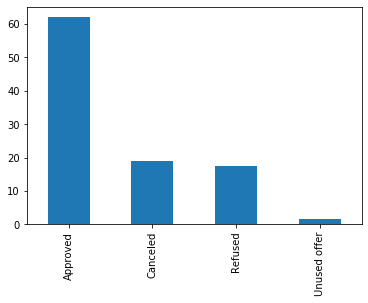

In [72]:
approvals = round(previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100, 2)
print(approvals)

approvals.plot.bar()
plt.show()

### Merging `application_data` and `previous_application`

In [73]:
applications = pd.merge(left=application_data, right=previous_application, how='inner', on='SK_ID_CURR')

In [74]:
columns = round(applications.isnull().sum() / len(applications) * 100, 2)
applications = applications.drop(columns[columns >= 50].index, axis=1)

applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,CNT_FAM_MEMBERS_RANGE,AGE_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,-637,-3648.0000,-2120,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,400001 - 600000,2Lac-5Lac,NaN,20-30,1038818,Consumer loans,9251.7750,179055.0000,179055.0000,179055.0000,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0000,low_normal,POS other with interest,365243.0000,-565.0000,125.0000,-25.0000,-17.0000,0.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1000001 and above,2Lac-5Lac,1-2,42-47,1810518,Cash loans,98356.9950,900000.0000,1035882.0000,900000.0000,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,low_normal,Cash X-Sell: low,365243.0000,-716.0000,-386.0000,-536.0000,-527.0000,1.0000
2,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,-1188,-1186.0000,-291,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.07

## Analysis on Merged Dataset

### Column `NAME_CONTRACT_TYPE`

##### Conclusion

In the analysis, it is uncovered, that `Cash loans` were approved at the highest rate than compared to `Revolving loans`.

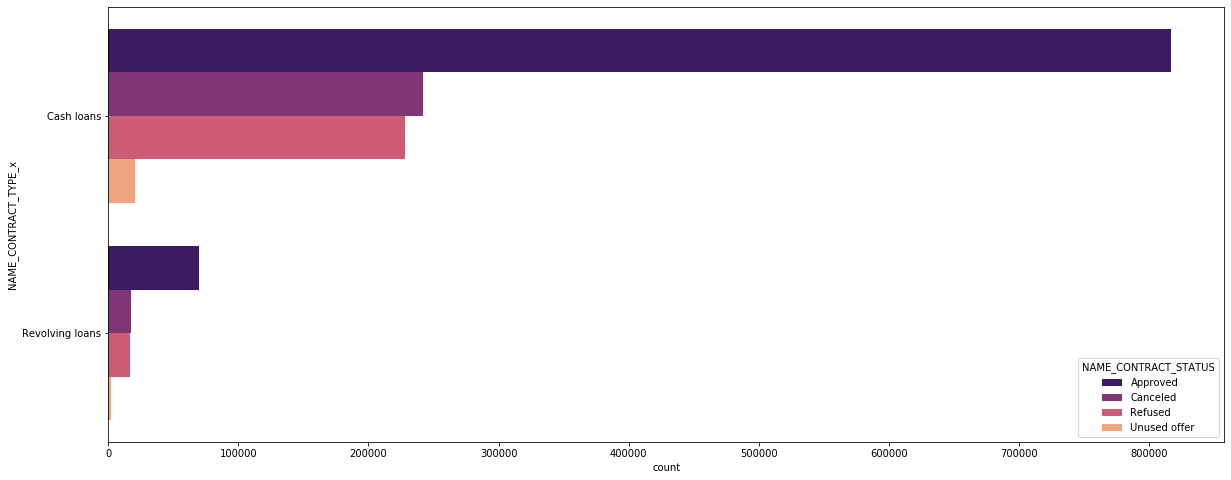

In [75]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `AMT_INCOME_TOTAL`

##### Conclusion

Loan was approved mostly for clients with income range of `1Lac to 2Lacs`, follwed by `2Lacs to 5Lacs`, while surprisingly, loan application was also canceled for the `1Lac to 2Lacs` is also highest followed by `2Lacs to 5Lacs` income range.

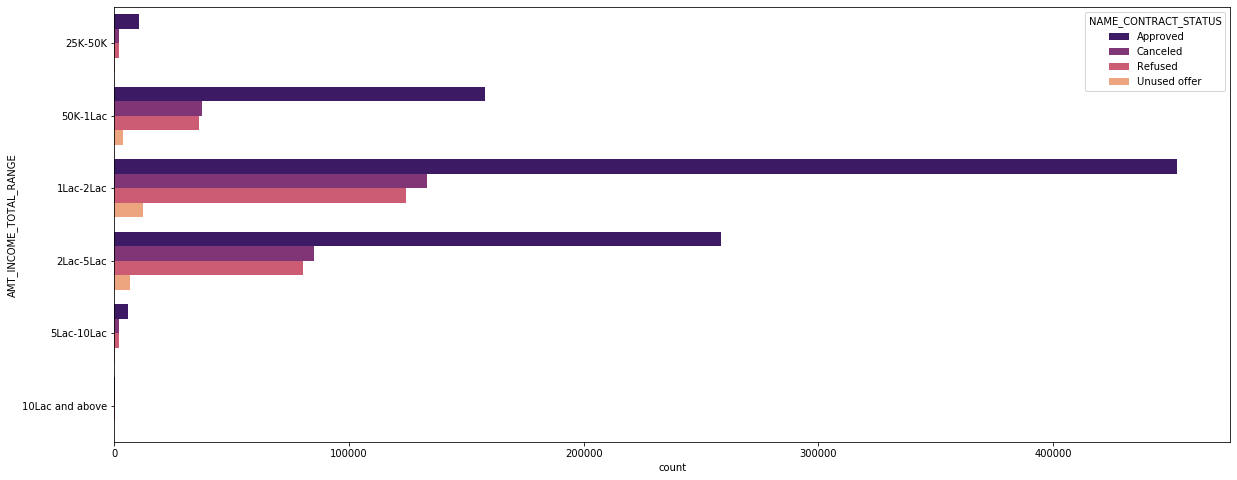

In [76]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications, y='AMT_INCOME_TOTAL_RANGE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `ORGANIZATION_TYPE`

Most of the loans were approved with client organization's stype `Business Entity Type 3` and then followed by clients whom organization type is unknown.

Loan was also canceled by client's whom organization type is unknown.

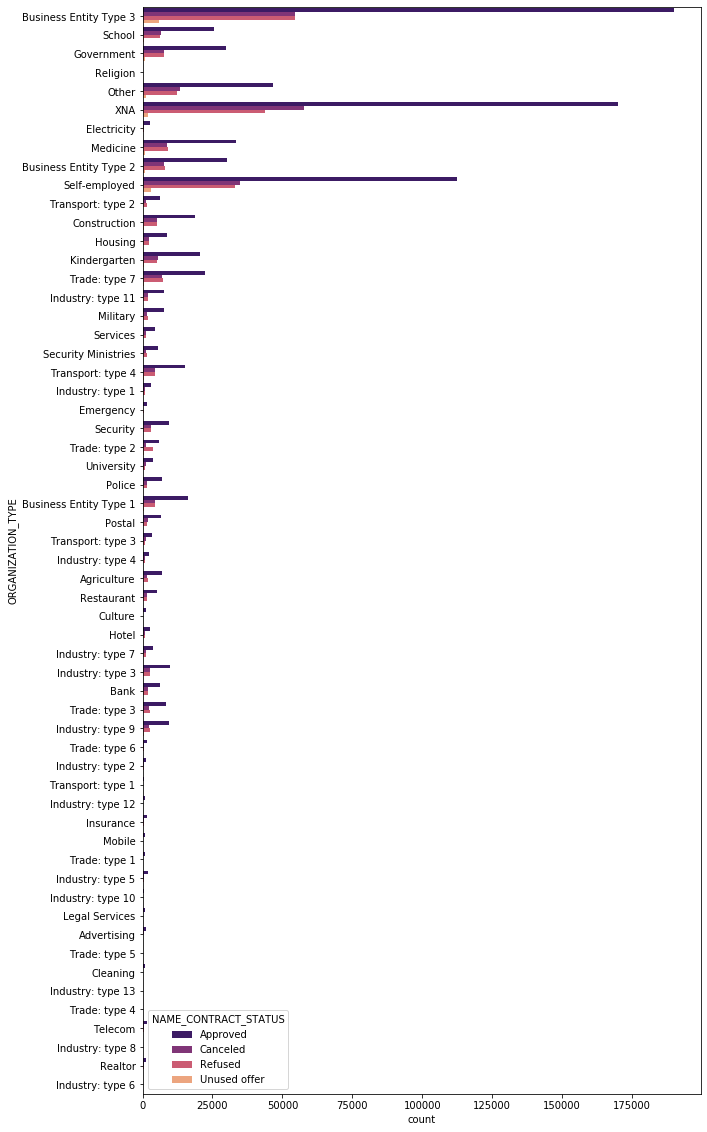

In [77]:
plt.figure(figsize=(10,20))
sns.countplot(data = applications, y='ORGANIZATION_TYPE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `AGE_BIRTH`

##### Conclusion

Loan was approved majorly for client's with age range `54-60` follwed by range `42-47` the `31-36`. Loan is canceled by clients highly in range `54-60` followed by age range `61-above`.

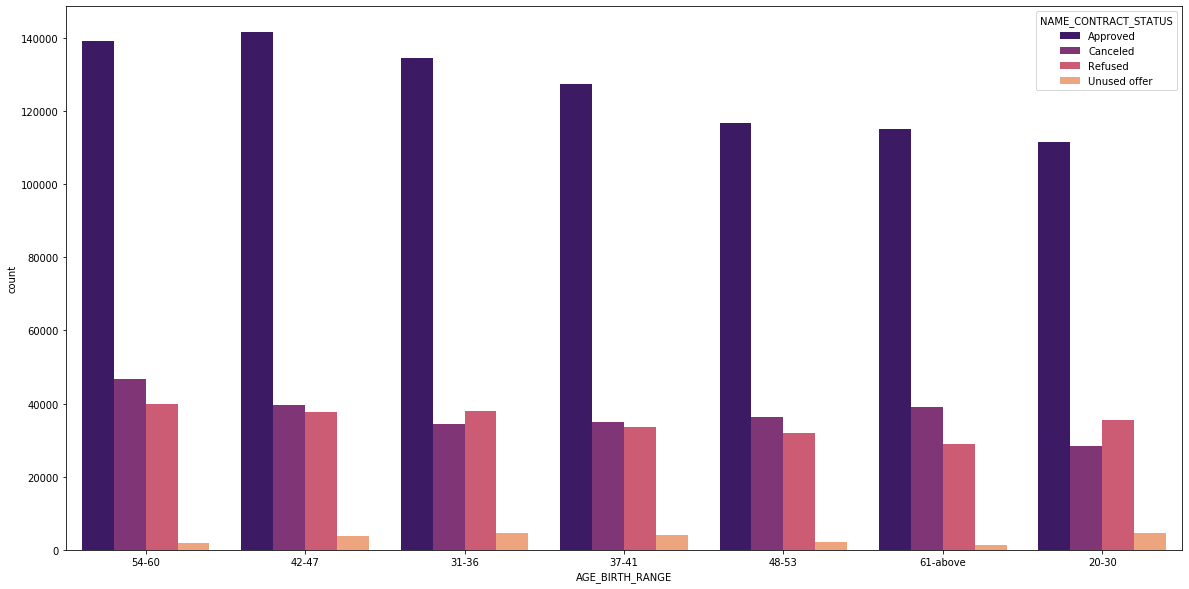

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(data = applications, x='AGE_BIRTH_RANGE', order=applications['AGE_BIRTH_RANGE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `NAME_CLIENT_TYPE`

##### Conclusion

Almost `73%` of the clients are repeating clients.

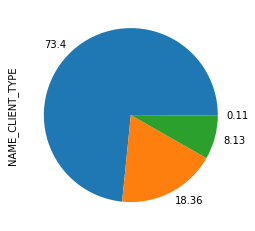

In [79]:
client_type = round(applications['NAME_CLIENT_TYPE'].value_counts(normalize=True) * 100, 2)

client_type.plot.pie(labels=client_type.values)

### Column `CODE_GENDER`

##### Conclusion
Females are more with every category , Loans approved, cancelled, Refused and usued. That means more applicants are female.



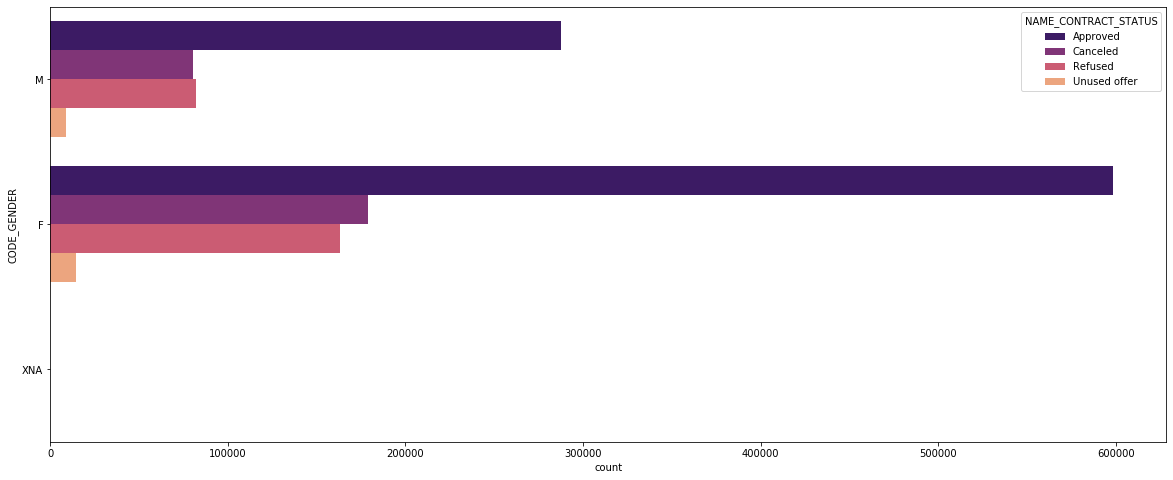

In [80]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `FLAG_OWN_CAR`

##### Conclusion
Here, People who car have more no of approved, cancelled, Refused loans, but less no of unused loans

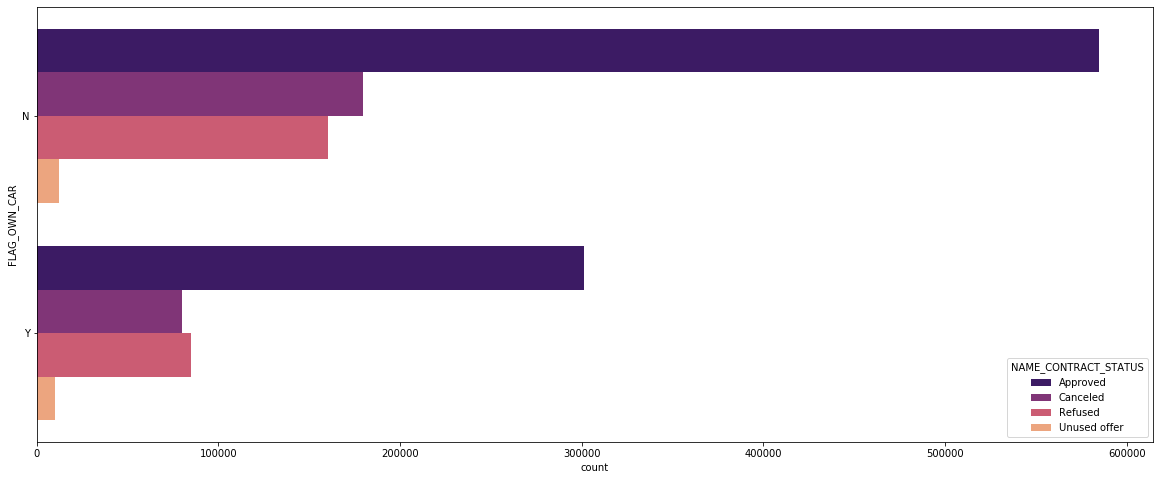

In [81]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'FLAG_OWN_CAR', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `NAME_EDUCATION_TYPE`

##### Conclusion
Here, People with Secondary/Secondary speical education type have more no of approved, cancelled, reused and usused loans,
while people with Academic degree has less.

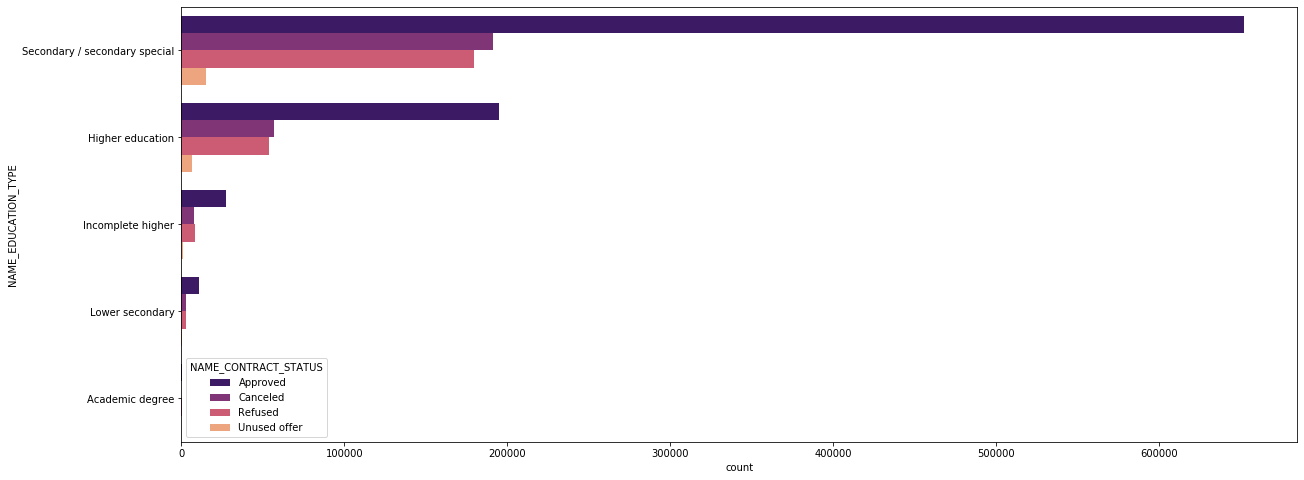

In [82]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `NAME_FAMILY_STATUS`

##### Conclusion
Here, People with Married family status have more no of approved, cancelled, reused and usused loans,
while people with widow, sepearted has less. Also People with Civil Marriage has very less unused loans

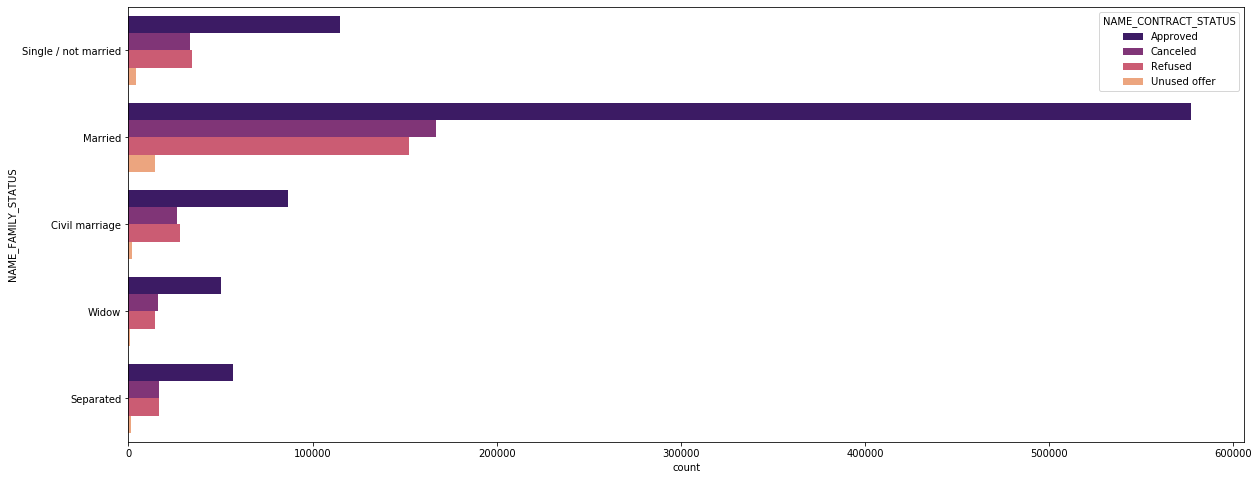

In [83]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `NAME_INCOME_TYPE`

##### Conclusion
Here, People with Working Income type have more no of approved, cancelled, reused and usused loans,
while people with unemployed, students and on maternity leave very have less. 

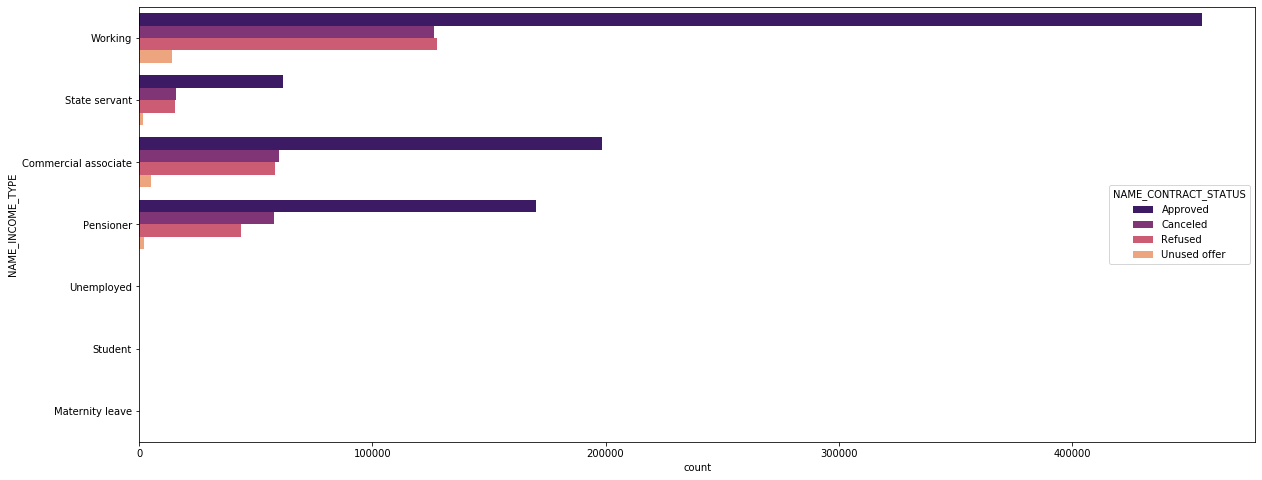

In [84]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'NAME_INCOME_TYPE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `CNT_CHILDREN`

##### Conclusion
Here, People with children count 0 have more no of approved, cancelled, reused and usused loans, 
while people with count more than 3 are very less in number.

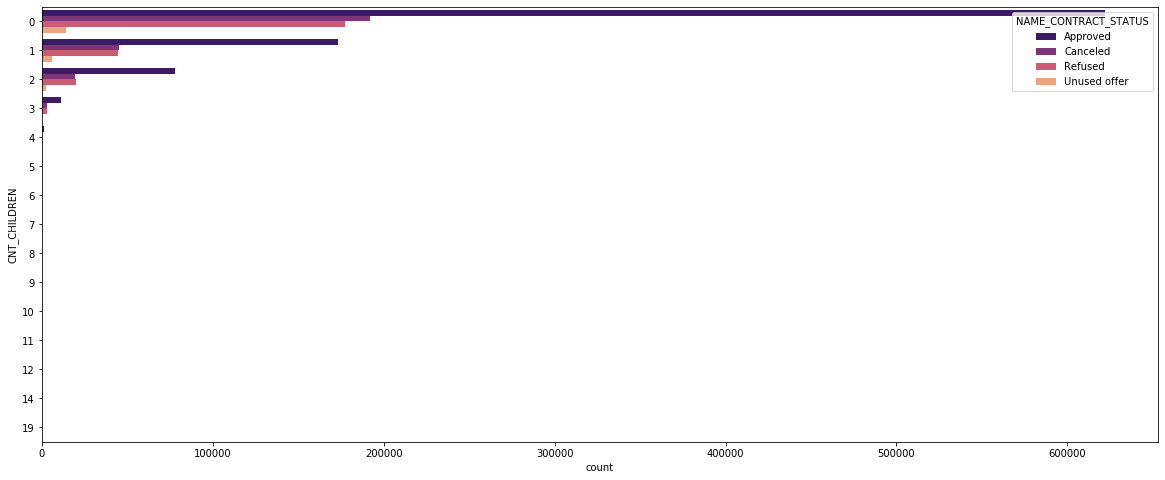

In [85]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'CNT_CHILDREN', hue = 'NAME_CONTRACT_STATUS',palette='magma')

#### Find Corelation matix for Merged Datatset

In [103]:
applications.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=117)

In [118]:
quants = applications.select_dtypes(['float', 'int'])
quants

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,202500.0000,406597.5000,24700.5000,351000.0000,0.0188,-3648.0000,1.0000,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0000,2.0000,2.0000,2.0000,-1134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,9251.7750,179055.0000,179055.0000,179055.0000,24.0000,365243.0000,-565.0000,125.0000,-25.0000,-17.0000,0.0000
1,270000.0000,1293502.5000,35698.5000,1129500.0000,0.0035,-1186.0000,2.0000,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,98356.9950,900000.0000,1035882.0000,900000.0000,12.0000,365243.0000,-716.0000,-386.0000,-536.0000,-527.0000,1.0000
2,270000.0000,1293502.5000,35698.5000,1129500.0000,0.0035,-1186.0000,2.0000,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,64567.6650,337500.0000,348637.5000,337500.0000,6.0000,365243.0000,-797.0000,-647.0000,-647.0000,-639.0000,0.0000
3,270000.0000,1293502.5000,35698.5000,1129500.0000,0.0035,-1186.0000,2.0000,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6737.3100,68809.5000,68053.5000,68809.5000,12.0000,365243.0000,-2310.0000,-1980.0000,-1980.0000,-1976.0000,1.0000
4,67500.0000,135000.0000,6750.0000,135000.0000,0.0100,-4260.0000,1.0000,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,0.0000,0.0000,-815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5357.2500,24282.0000,20106.0000,24282.0000,4.0000,365243.0000,-784.0000,-694.0000,-724.0000,-714.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,157500.0000,675000.0000,49117.5000,675000.0000,0.0462,-5128.0000,2.0000,0.7086,0.1139,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,0.0000,0.0000,0.0000,0.0000,-787.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,16400.6100,229500.0000,254340.0000,229500.0000,24.0000,365243.0000,-618.0000,72.0000,-558.0000,-528.0000,1.0000
1413697,157500.0000,675000.0000,49117.5000,675000.0000,0.0462,-5128.0000,2.0000,0.7086,0.1139,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,0.0000,0.0000,0.0000,0.0000,-787.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,2250.0000,45000.0000,45000.0000,45000.0000,0.0000,nan,nan,nan,nan,nan,nan
1413698,157500.0000,675000.0000,49117.5000,675000.0000,0.0462,-5128.0000,2.0000,0.7086,0.1139,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,0.0000,0.0000,0.0000,0.0000,-787.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,30737.6550,765000.0000,1067940.0000,765000.0000,60.0000,nan,nan,nan,nan,nan,nan
1413699,157500.0000,675000.0000,49117.5000,675000.0000,0.0462,-5128.0000,2.0000,0.7086,0.1139,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,0.0000,0.0000,0.0000,0.0000,-787.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,54022.1400,1170000.0000,1271929.5000,1170000.0000,36.0000,365243.0000,-756.0000,294.0000,-66.0000,-64.0000,0.0000


In [137]:
num_df = applications[['NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_GOODS_PRICE_x','AMT_ANNUITY_x', 'CNT_FAM_MEMBERS','CNT_CHILDREN','REGION_POPULATION_RELATIVE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']]

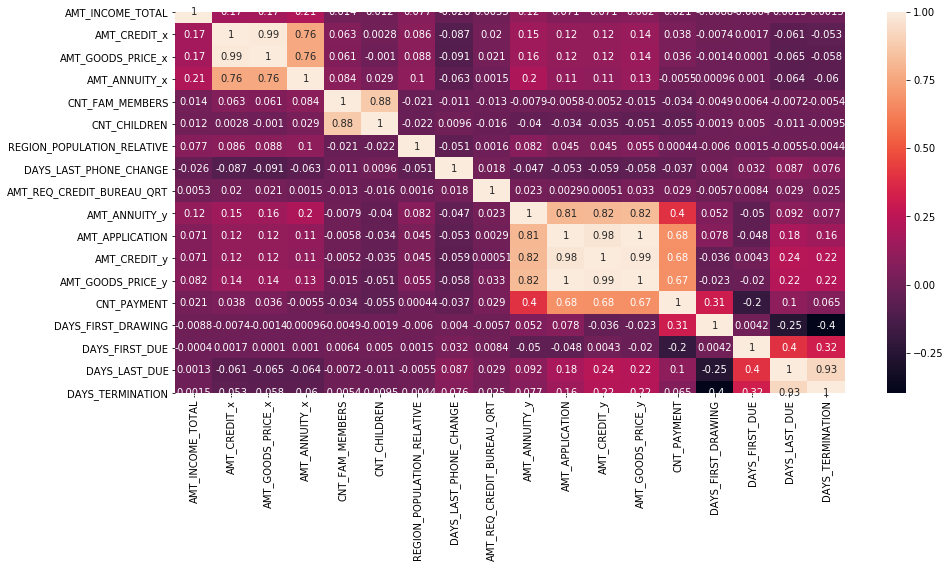

In [138]:
plt.figure(figsize = (15,7))

corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot =True)

In [141]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [142]:
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf

,Var1,Var2,Correlation
0,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,nan
1,AMT_INCOME_TOTAL,AMT_CREDIT_x,nan
2,AMT_INCOME_TOTAL,AMT_GOODS_PRICE_x,nan
3,AMT_INCOME_TOTAL,AMT_ANNUITY_x,nan
4,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,nan
...,...,...,...
319,DAYS_TERMINATION,CNT_PAYMENT,0.0654
320,DAYS_TERMINATION,DAYS_FIRST_DRAWING,-0.3965
321,DAYS_TERMINATION,DAYS_FIRST_DUE,0.3211
322,DAYS_TERMINATION,DAYS_LAST_DUE,0.9277


In [143]:
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [144]:
positive = corrdf[corrdf['Correlation'] > 0].sort_values(by='Correlation', ascending=False)
negative = corrdf[corrdf['Correlation'] < 0].sort_values(by='Correlation', ascending=True)

In [135]:
positive.head(10)

,Var1,Var2,Correlation
190,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.9999
191,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.9932
31,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.9863
175,AMT_CREDIT_y,AMT_APPLICATION,0.9757
79,CNT_CHILDREN,CNT_FAM_MEMBERS,0.8792
189,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.8222
174,AMT_CREDIT_y,AMT_ANNUITY_y,0.8180
159,AMT_APPLICATION,AMT_ANNUITY_y,0.8100
47,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,0.7623
46,AMT_ANNUITY_x,AMT_CREDIT_x,0.7584


In [145]:
negative.head(10)

,Var1,Var2,Correlation
320,DAYS_TERMINATION,DAYS_FIRST_DRAWING,-0.3965
302,DAYS_LAST_DUE,DAYS_FIRST_DRAWING,-0.2543
283,DAYS_FIRST_DUE,CNT_PAYMENT,-0.1988
128,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE_x,-0.0913
127,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_x,-0.0873
290,DAYS_LAST_DUE,AMT_GOODS_PRICE_x,-0.0654
291,DAYS_LAST_DUE,AMT_ANNUITY_x,-0.0642
129,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY_x,-0.0632
289,DAYS_LAST_DUE,AMT_CREDIT_x,-0.0611
309,DAYS_TERMINATION,AMT_ANNUITY_x,-0.0597


#### Topmost co-related (Positive & Negative) columns 

Below columns from positive correlated variables.

1. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_APPLICATION
2. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_CREDIT_y
3. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_CREDIT_x
4. **Var 1** - AMT_CREDIT_y, **Var 2** - AMT_APPLICATION
5. **Var 1** - CNT_CHILDREN, **Var 2** - CNT_FAM_MEMBERS	
6. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_ANNUITY_y
7. **Var 1** - AMT_CREDIT_y, **Var 2** - AMT_ANNUITY_y
8. **Var 1** - AMT_APPLICATION, **Var 2** - AMT_ANNUITY_y	
9. **Var 1** - AMT_ANNUITY_x, **Var 2** - AMT_GOODS_PRICE_x
10. **Var 1** - AMT_ANNUITY_x, **Var 2** - AMT_CREDIT_x

As negative correlated variables are not highly correlated as they are much close to zero than to -1, we can say that they are not highly correlated can be neglected from analysis.